**Importing Libraries**

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Loading Dataset**

In [43]:
df = pd.read_csv("/content/Medical_insurance.csv")

**Displaying First 5 rows**

In [44]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Displaying Last 5 rows**

In [45]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229
2771,54,male,31.600,0,no,southwest,9850.43200


**Summary of Dataset**

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


**Descriptive Statistics**

In [47]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [48]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,2772.0,39.109668,14.081459,18.0000,26.000,39.00000,51.0000,64.00000
bmi,2772.0,30.701349,6.129449,15.9600,26.220,30.44750,34.7700,53.13000
children,2772.0,1.101732,1.214806,0.0000,0.000,1.00000,2.0000,5.00000
charges,2772.0,13261.369959,12151.768945,1121.8739,4687.797,9333.01435,16577.7795,63770.42801


**Frequency of each Feature**

In [49]:
df['sex'].value_counts()

,count
sex,
male,1406
female,1366


In [50]:
df['region'].value_counts()

,count
region,
southeast,766
southwest,684
northwest,664
northeast,658


In [51]:
df['smoker'].value_counts()

,count
smoker,
no,2208
yes,564


In [52]:
df['children'].value_counts()

,count
children,
0,1186
1,672
2,496
3,324
4,52
5,42


**Displaying datatypes of all Features**

In [53]:
df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


**Displaying Number of rows and Number of Columns**

In [54]:
df.shape

(2772, 7)

**Checking Null Values**

In [55]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [56]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

**Converting sex,smoker columns into Numeric Values**

In [72]:
df['sex']= label_encoder.fit_transform(df['sex'])
df['smoker']= label_encoder.fit_transform(df['smoker'])

**Visualization**

<Axes: ylabel='charges'>

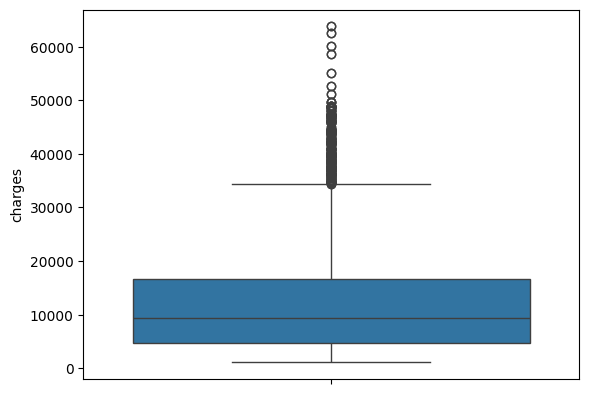

In [73]:
sns.boxplot(df['charges'])

Text(0.5, 1.0, 'The number of smokers and non-smokers (18 years old)')

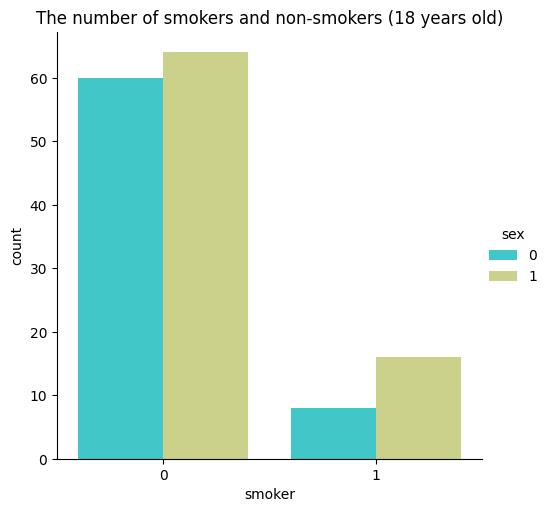

In [74]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow", data=df[(df.age == 18)])
plt.title("The number of smokers and non-smokers (18 years old)")

<ipython-input-75-f3fd8f908ca1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="smoker", x="charges", data = df[(df.age == 18)] , orient="h", palette = 'pink')


<Axes: title={'center': 'Box plot for charges 18 years old smokers'}, xlabel='charges', ylabel='smoker'>

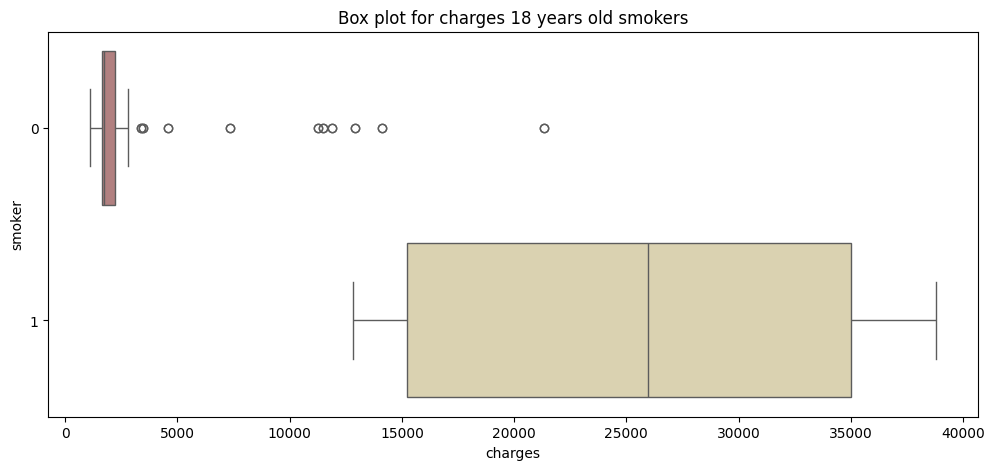

In [75]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges 18 years old smokers")
sns.boxplot(y="smoker", x="charges", data = df[(df.age == 18)] , orient="h", palette = 'pink')

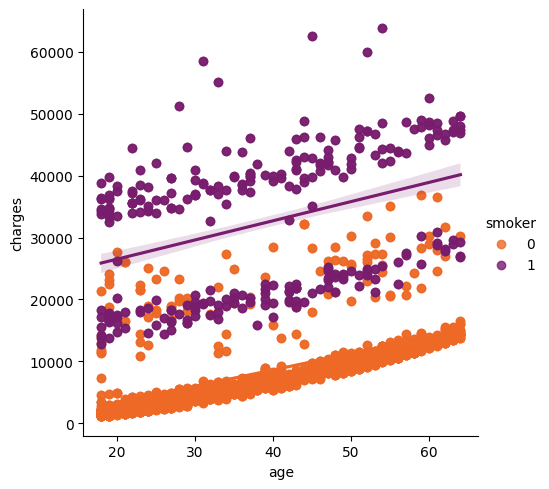

In [76]:
sns.lmplot(x="age", y="charges", hue="smoker", data=df, palette = 'inferno_r')

In [77]:
charges = df['charges'].groupby(df['region']).sum().sort_values(ascending = True)
charges = charges.head()

<ipython-input-78-fb4ef07aa984>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=charges.index, y=charges, palette='Blues')


<Axes: xlabel='region', ylabel='charges'>

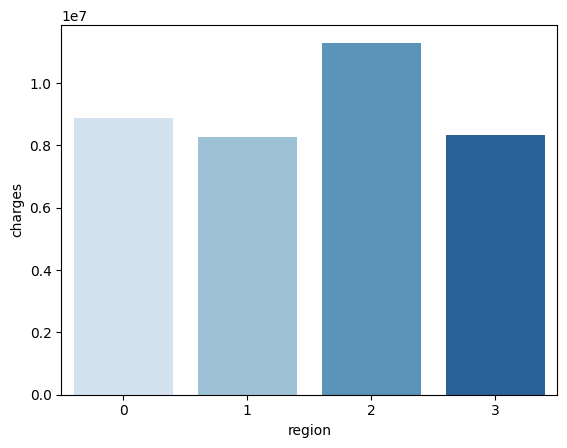

In [78]:
sns.barplot(x=charges.index, y=charges, palette='Blues')

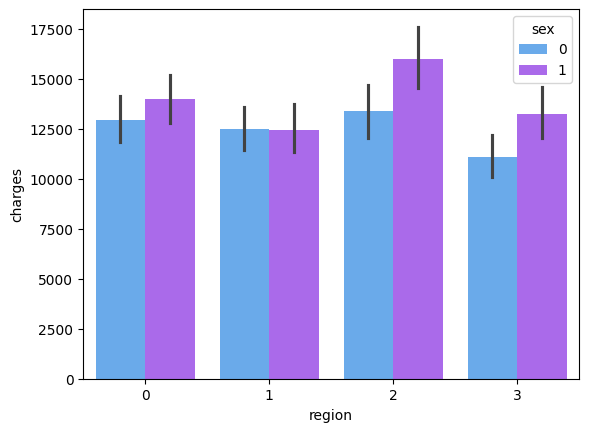

In [80]:
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')

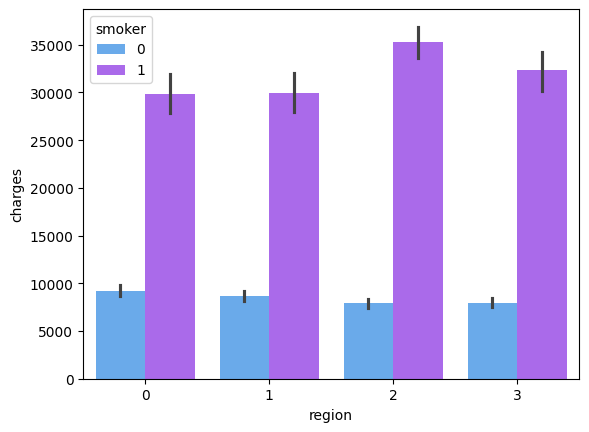

In [81]:
ax = sns.barplot(x='region', y='charges', hue='smoker', data=df, palette='cool')

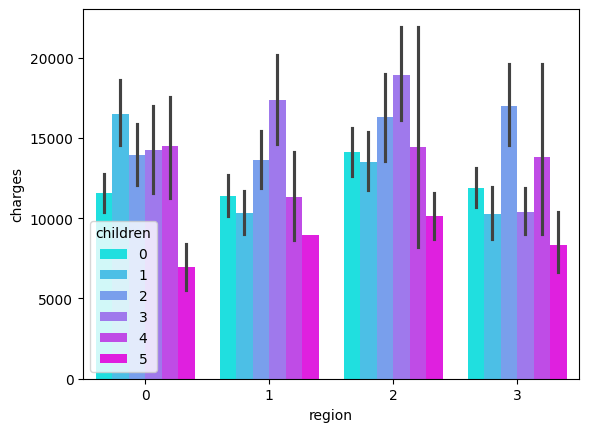

In [82]:
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='cool')

**Converting region column into numeric values**

In [83]:
df['region']= label_encoder.fit_transform(df['region'])

In [84]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
2767,47,0,45.320,1,0,2,8569.86180
2768,21,0,34.600,0,0,3,2020.17700
2769,19,1,26.030,1,1,1,16450.89470
2770,23,1,18.715,0,0,1,21595.38229


<Axes: >

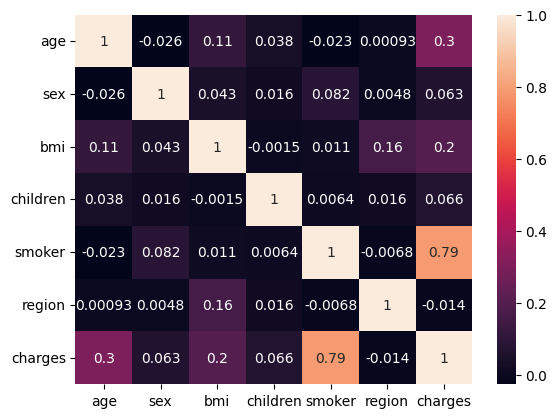

In [85]:
sns.heatmap(df.corr(),annot=True)

**Splitting data into training and testing data**

In [86]:
from sklearn.model_selection import train_test_split
x = df[["age", "bmi", "smoker", "region", "children", "sex"]]
y = df['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**Extreme Gradient Boosting**

In [87]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
xgb_r = XGBRegressor(objective ='reg:squarederror', n_estimators = 10, seed = 123)

xgb_r.fit(x_train,y_train)# fitting the data
xgbrpred=xgb_r.predict(x_test)#predicting the price
print("R2 Score[Testing]:",r2_score(y_test,xgbrpred))#R2 score

R2 Score[Testing]: 0.8890125853010048


In [88]:
print('Extreme Gradient Boosting Training Score %.2f%% '%(xgb_r.score(x_train,y_train)*100))

Extreme Gradient Boosting Training Score 92.76% 


In [89]:
print('Extreme Gradient Boosting Testing Score %.2f%% '%(xgb_r.score(x_test,y_test)*100))

Extreme Gradient Boosting Testing Score 88.90% 


**Parameter Tuning**

In [107]:
from xgboost import XGBRegressor

best_model = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_estimators=700,
    max_depth=5,
    learning_rate=0.1,
    gamma=0.1,
    subsample=0.7,
    colsample_bytree=0.9
)

# Try this block - remove early stopping if it's incompatible with your version
try:
    best_model.fit(
        x_train, y_train,
        eval_set=[(x_test, y_test)],
        eval_metric='rmse',
        early_stopping_rounds=10,
        verbose=False
    )
except TypeError:
    print("Skipping early_stopping_rounds due to version compatibility.")
    best_model.fit(x_train, y_train)


Skipping early_stopping_rounds due to version compatibility.


In [91]:
best_model.fit(x_train,y_train)
x_train_predict=best_model.predict(x_train)
x_test_predict=best_model.predict(x_test)
print('Extreme Gradient Boosting training Score after parameter tuning %.2f%% '%(best_model.score(x_train,y_train)*100))

Extreme Gradient Boosting training Score after parameter tuning 99.71% 


In [92]:
print('Extreme Gradient Boosting Testing Score after parameter tuning %.2f%% '%(best_model.score(x_test,y_test)*100))

Extreme Gradient Boosting Testing Score after parameter tuning 95.18% 


In [93]:
r2_score2=r2_score(y_train,x_train_predict)
print("R2 Score[Training]:",r2_score2)

R2 Score[Training]: 0.9971336696884058


In [94]:
r2_score2=r2_score(y_test,x_test_predict)
print("R2 Score[Testing]:",r2_score2)

R2 Score[Testing]: 0.9517504529165639


In [95]:
MSE_train=mean_squared_error(y_train,x_train_predict)
print("Mean Squared Error[Training]:",MSE_train)

Mean Squared Error[Training]: 418721.9535033636


In [96]:
MSE_test=mean_squared_error(y_test,x_test_predict)
print("Mean Squared Error[Testing]:",MSE_test)

Mean Squared Error[Testing]: 7405386.669677819


In [97]:
import math
RMSE_train=math.sqrt(mean_squared_error(y_train,x_train_predict))
print("Root Mean Squared Error[Training]:",RMSE_train)

Root Mean Squared Error[Training]: 647.0872843004748


In [98]:
RMSE_test=math.sqrt(mean_squared_error(y_test,x_test_predict))
print("Root Mean Squared Error[Testing]:",RMSE_test)

Root Mean Squared Error[Testing]: 2721.2840112119534


In [99]:
MAE_train=mean_absolute_error(y_train,x_train_predict)
print("Mean Absolute Error[Training]:",MAE_train)

Mean Absolute Error[Training]: 406.53323958676344


In [100]:
MAE_test=mean_absolute_error(y_test,x_test_predict)
print("Mean Absolute Error[Testing]:",MAE_test)

Mean Absolute Error[Testing]: 1263.5200245657993


**Feature Importance**

In [101]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor()

In [102]:
print(selection.feature_importances_)

[0.12947028 0.19057862 0.62297494 0.02200965 0.02470171 0.0102648 ]


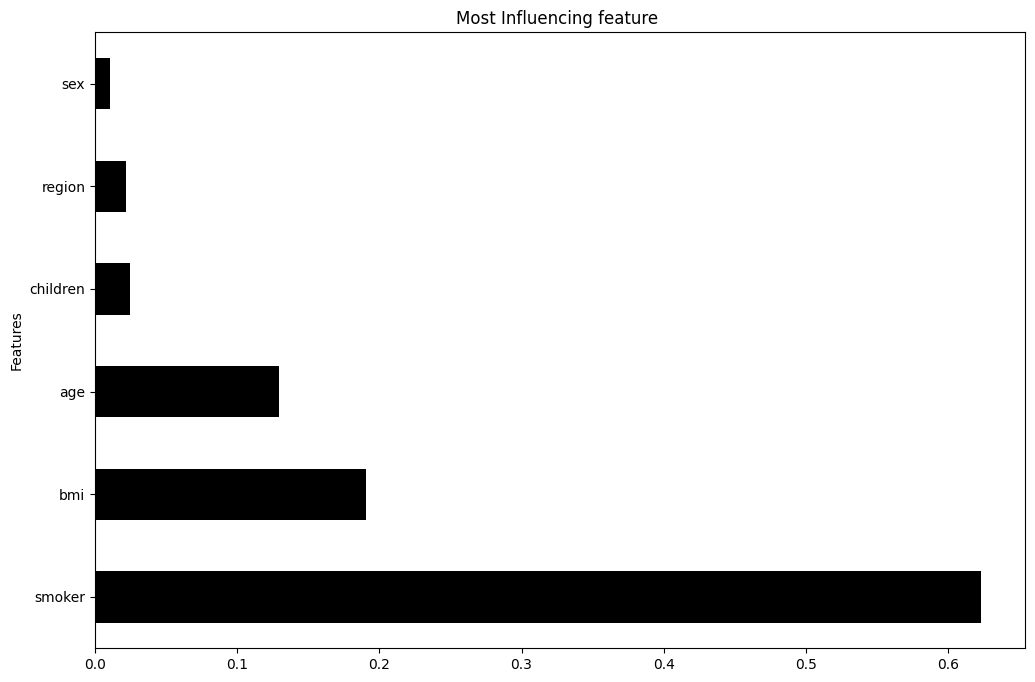

In [103]:
plt.figure(figsize = (12,8))
plt.title("Most Influencing feature ")
plt.ylabel('Features')
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh',color='black')
plt.show()

**Saving the Model**

In [104]:
from pickle import dump
dump(best_model,open('model_final.pkl','wb'))

In [105]:
import pickle  # For saving the model

# Save the trained model
with open("model_final.pkl", "wb") as file:
    pickle.dump(best_model, file)  # Save your trained model